<a href="https://colab.research.google.com/github/ungvietanh20172394/global_threshold/blob/main/PhanNguongColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ngưỡng tìm được:  [96.85551602035204, 102.48120534341683, 105.17265568395086, 106.58564027925465, 107.01979843476505]


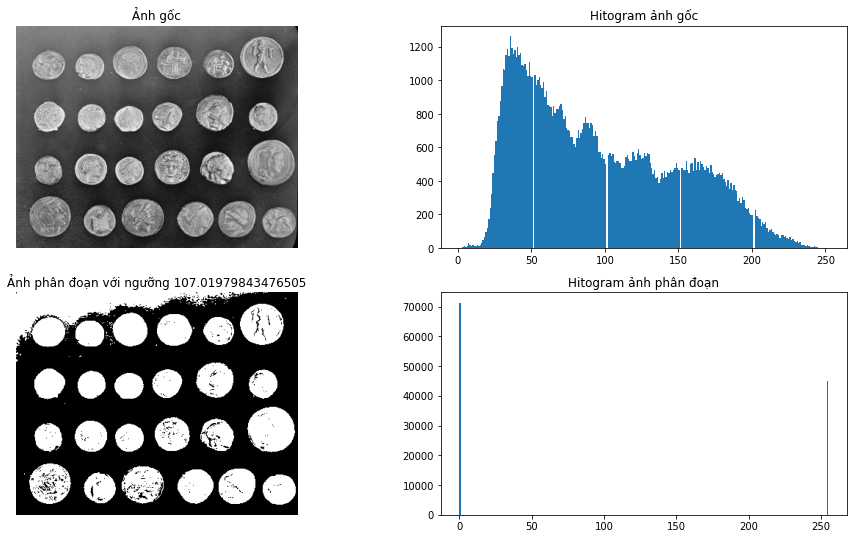

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import data # lấy ảnh có sẵn trong skimage để demo

class PhanNguong: 
    def __init__(self, input = None, epsilon = 1):
        self.input = input if input is not None else data.coins()
        self.epsilon = epsilon
        self.threshold = self.find_global_thresholding() 
        self.output = np.where(self.input > self.threshold[-1], 255, 0) 

    def find_global_thresholding(self): 
        # Bước 1: Khởi tạo giá trị T
        t = [np.mean(self.input)]
        while (True):
            # Bước 2. Xác định 2 nhóm điểm ảnh
            c1, c2 = [], [] # Định nghĩa nhóm c1 va c2 
            for i in range(self.input.shape[0]):
                for j in range(self.input.shape[1]):
                    if (self.input[i,j] < t[-1]):
                        c1.append(self.input[i,j])
                    else:
                        c2.append(self.input[i,j])
            # Bước 3: Tính trung bình về mức xám của C1 và C2 -> μ1 và μ2
            u1, u2 = np.mean(c1), np.mean(c2)
            
            # Bước 4:Tính giá trị mới của T
            t.append(((u1+ u2)/2))
            if(abs(t[-1]-t[-2]) < self.epsilon):
                break
        print("Ngưỡng tìm được: ",t)
        return t 

    def plot(self):
        fig = plt.figure(figsize=(16, 9))
        (ax1, ax2), (ax3, ax4) = fig.subplots(2, 2)
        ax1.imshow(self.input, cmap='gray')
        ax1.set_title('Ảnh gốc')
        ax1.axis('off')
        ax2.hist(self.input.flatten(),bins=256)
        ax2.set_title('Hitogram ảnh gốc')
        ax3.imshow(self.output, cmap='gray')
        ax3.set_title('Ảnh phân đoạn với ngưỡng ' + str(self.threshold[-1]))
        ax3.axis('off')
        ax4.hist(self.output.flatten(), bins=256)
        ax4.set_title('Hitogram ảnh phân đoạn')
        plt.show()

    def plot2(self): 
        fig1 = plt.figure(figsize=(16, (len(self.threshold) + 1)*4)) 
        # fig1.subplots(2, (len(self.threshold) + 1) % 3 + 1)
        fig1.subplots((len(self.threshold) + 1), 2)
        lst = [("Ảnh phân đoạn với ngưỡng " + str(x), np.where(self.input > x, 255, 0)) for x in self.threshold]
        lst.insert(0, ("Ảnh gốc", self.input)) 
        index = 0
        for index, ax in enumerate(fig1.get_axes()): 
            if (index % 2 ==0):
                ax.set_title(lst[index//2][0])
                ax.imshow(lst[index//2][1], cmap='gray')
                ax.axis('off')
            else:
                ax.hist(lst[index//2][1].flatten(),bins=256)
                ax.set_title('Histogram') 
        plt.show()


if __name__ == "__main__": 
    res = PhanNguong()
    res.plot()

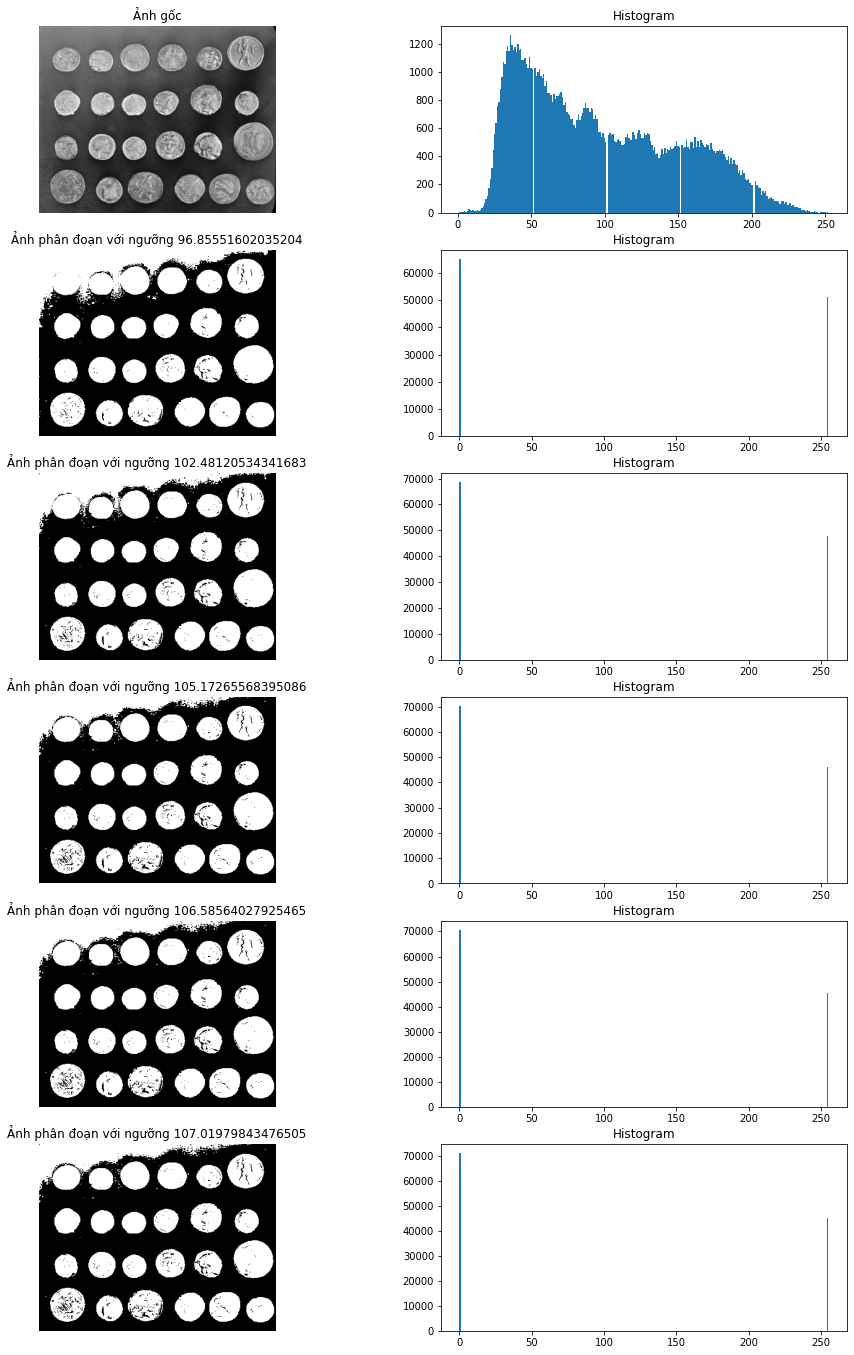

In [6]:
res.plot2()